# 1. 라이브러리 불러오기

In [8]:
import tensorflow as tf
import numpy as np
from tensorflow.keras import datasets, layers, models
from keras.utils import plot_model
import matplotlib.pyplot as plt

# 2. 데이터 읽어오기

In [12]:
# 훈련용, 평가용 데이터 분류해서 가져오기
# 훈련용(Train) 질문:답, 평가용(test) 질문:답
(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()

In [13]:
# 데이터 확인
train_images.shape, train_labels.shape, test_images.shape, test_labels.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [16]:
!pip install tensorflow_datasets

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     ---------------------------------------- 0.0/57.6 kB ? eta -:--:--
     ---------------------------------------- 57.6/57.6 kB 1.5 MB/s eta 0:00:00
   ---------------------------------------- 0.0/5.1 MB ? eta -:--:--
   ---- ----------------------------------- 0.5/5.1 MB 10.7 MB/s eta 0:00:01
   ---------- ----------------------------- 1.3/5.1 MB 14.2 MB/s eta 0:00:01
   -------------------- ------------------- 2.6/5.1 MB 18.6 MB/s eta 0:00:01
   ------------------------ --------------- 3.1/5.1 MB 20.1 MB/s eta 0:00:01
   ------------------------ --------------- 3.1/5.1 MB 20.1 MB/s eta 0:00:01
   ---------------------------------------  5.0/5.1 MB 17.9 MB/s eta 0:00:01
   ---------------------------------------- 5.1/5.1 MB 17.0 MB/s eta 0:00:00
   ---------------------------------------- 0.0/152.4 kB ? eta -:--:--
   ---------------------------------------- 152.4/152.4 kB 8.9 MB/s

  You can safely remove it manually.


In [17]:
import tensorflow_datasets as tfds
tfds.list_builders()

['abstract_reasoning',
 'accentdb',
 'aeslc',
 'aflw2k3d',
 'ag_news_subset',
 'ai2_arc',
 'ai2_arc_with_ir',
 'amazon_us_reviews',
 'anli',
 'answer_equivalence',
 'arc',
 'asqa',
 'asset',
 'assin2',
 'asu_table_top_converted_externally_to_rlds',
 'austin_buds_dataset_converted_externally_to_rlds',
 'austin_sailor_dataset_converted_externally_to_rlds',
 'austin_sirius_dataset_converted_externally_to_rlds',
 'bair_robot_pushing_small',
 'bc_z',
 'bccd',
 'beans',
 'bee_dataset',
 'beir',
 'berkeley_autolab_ur5',
 'berkeley_cable_routing',
 'berkeley_fanuc_manipulation',
 'berkeley_gnm_cory_hall',
 'berkeley_gnm_recon',
 'berkeley_gnm_sac_son',
 'berkeley_mvp_converted_externally_to_rlds',
 'berkeley_rpt_converted_externally_to_rlds',
 'big_patent',
 'bigearthnet',
 'billsum',
 'binarized_mnist',
 'binary_alpha_digits',
 'ble_wind_field',
 'blimp',
 'booksum',
 'bool_q',
 'bot_adversarial_dialogue',
 'bridge',
 'bucc',
 'c4',
 'c4_wsrs',
 'caltech101',
 'caltech_birds2010',
 'caltech_b

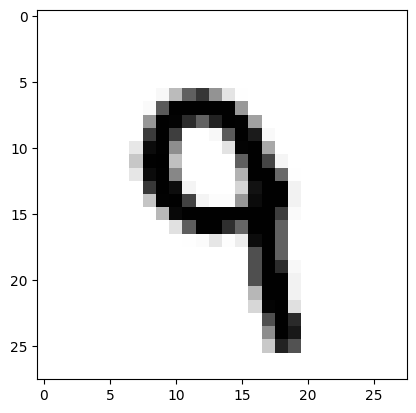

In [20]:
# train_images 어떻게생겼는지 ?, train_labels 어떻게 생겼는지 ?
plt.imshow(train_images[35556], cmap='Greys')

In [21]:
train_labels[35556]

9

In [22]:
# 전처리 작업
train_images = train_images.reshape((60000, 28, 28, 1))

In [23]:
test_images = test_images.reshape((10000, 28, 28, 1))

In [24]:
train_images.shape, test_images.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

In [25]:
train_images[35556]

array([[[  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0]],

       [[  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0]],

       [[  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
      

In [26]:
# 0-255를 0과 1사이의 실수로 변경
train_images, test_images = train_images / 255., test_images / 255.

In [27]:
train_images[0]

array([[[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ]],

       [[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        

# 3. 신경망 만들기

In [29]:
# Keras 모델 설계
model = models.Sequential()
model.add(layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))

C:\Users\hi\anaconda3\envs\p310_cnn\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [30]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━┓
┃ Layer (type)             ┃ Output Shape      ┃   Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━┩
│ conv2d (Conv2D)          │ (None, 26, 26,    │       320 │
│                          │ 32)               │           │
├──────────────────────────┼───────────────────┼───────────┤
│ max_pooling2d            │ (None, 13, 13,    │         0 │
│ (MaxPooling2D)           │ 32)               │           │
├──────────────────────────┼───────────────────┼───────────┤
│ conv2d_1 (Conv2D)        │ (None, 11, 11,    │    18,496 │
│                          │ 64)               │           │
├──────────────────────────┼───────────────────┼───────────┤
│ max_pooling2d_1          │ (None, 5, 5, 64)  │         0 │
│ (MaxPooling2D)           │                   │           │
├──────────────────────────┼───────────────────┼───────────┤
│ conv2d_2 (Conv2D)        │ (None, 3, 3, 64)  │    36,928 │
├──────────────────────────┼───────────────────┼───────────┤
│ max_pooling2d_2          │ (None, 1, 1, 64)  │         0 │
│ (MaxPooling2D)           │                   │           │
└──────────────────────────┴───────────────────┴───────────┘

 Total params: 55,744 (217.75 KB)

 Trainable params: 55,744 (217.75 KB)

 Non-trainable params: 0 (0.00 B)

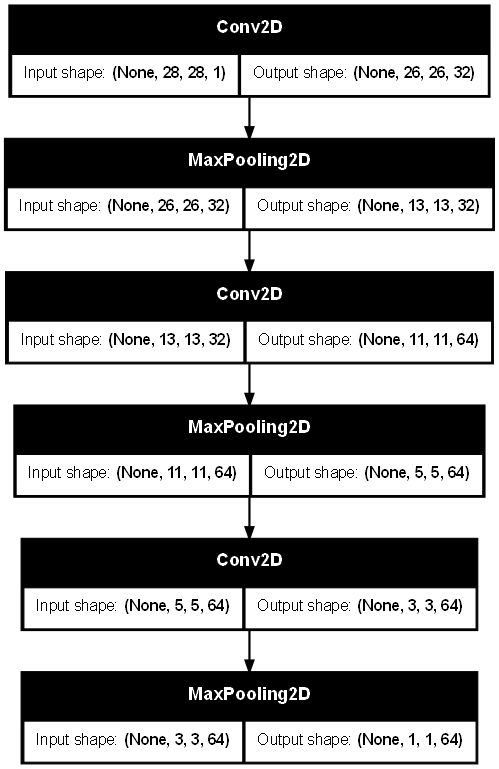

In [31]:
# 그래프로 제작된 모델 확인
plot_model(model, show_shapes=True, dpi=80)

In [32]:
# 분류단계
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

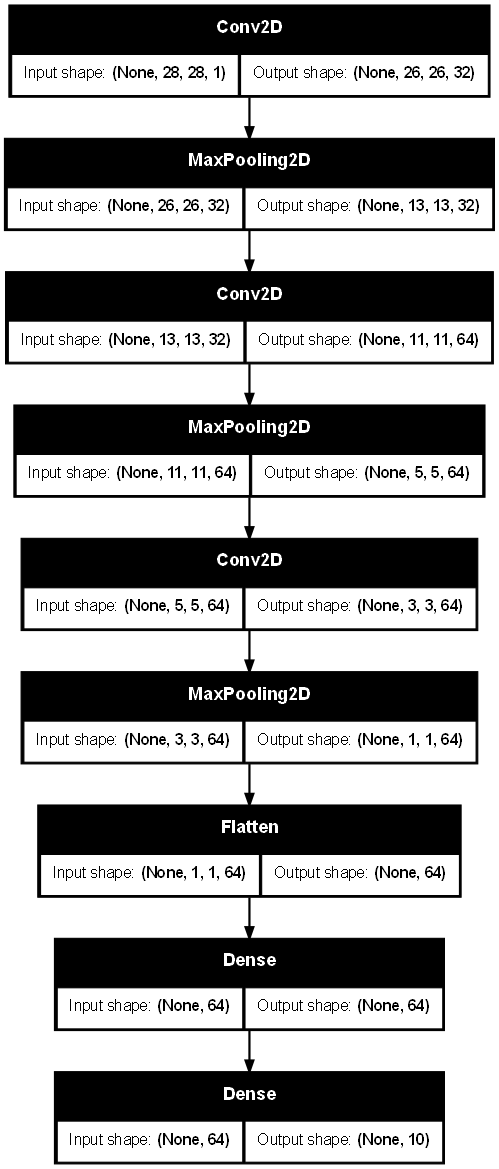

In [33]:
plot_model(model, show_shapes=True, dpi=80)

# 4. 모델 만들고 학습하기

In [34]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [35]:
# 모델 훈련
history = model.fit(
    train_images, train_labels, batch_size=16, epochs=50, verbose=1, 
    validation_data=(test_images, test_labels)
)

Epoch 1/50
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 20s 5ms/step - accuracy: 0.8779 - loss: 0.3869 - val_accuracy: 0.9766 - val_loss: 0.0769
Epoch 2/50
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 18s 5ms/step - accuracy: 0.9793 - loss: 0.0667 - val_accuracy: 0.9821 - val_loss: 0.0595
Epoch 3/50
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 18s 5ms/step - accuracy: 0.9852 - loss: 0.0473 - val_accuracy: 0.9834 - val_loss: 0.0530
Epoch 4/50
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 21s 5ms/step - accuracy: 0.9899 - loss: 0.0335 - val_accuracy: 0.9878 - val_loss: 0.0416
Epoch 5/50
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 19s 5ms/step - accuracy: 0.9917 - loss: 0.0256 - val_accuracy: 0.9852 - val_loss: 0.0498
Epoch 6/50
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 19s 5ms/step - accuracy: 0.9930 - loss: 0.0217 - val_accuracy: 0.9878 - val_loss: 0.0478
Epoch 7/50
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 19s 5ms/step - accuracy: 0.9933 - loss: 0.0198 - val_accuracy: 0.9871 - val_loss: 0.0473
Epoch 8/50
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 19s 5ms/step - accuracy: 0.9948 - loss: 0

In [36]:
# 훈련결과 정보 확인
history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

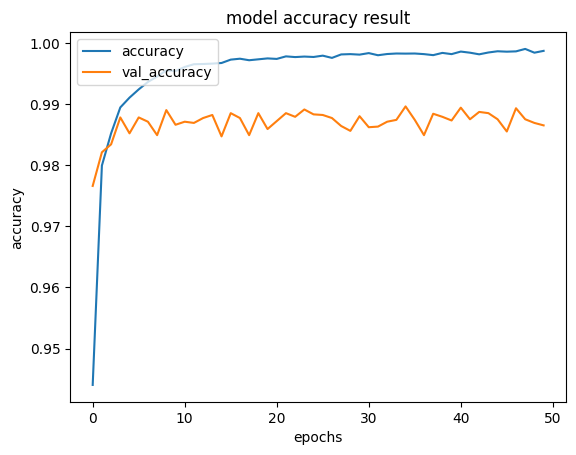

In [38]:
# 훈련결과 그래프 표시
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy result')
plt.ylabel('accuracy')
plt.xlabel('epochs')
plt.legend(['accuracy','val_accuracy'], loc='upper left')
plt.show()

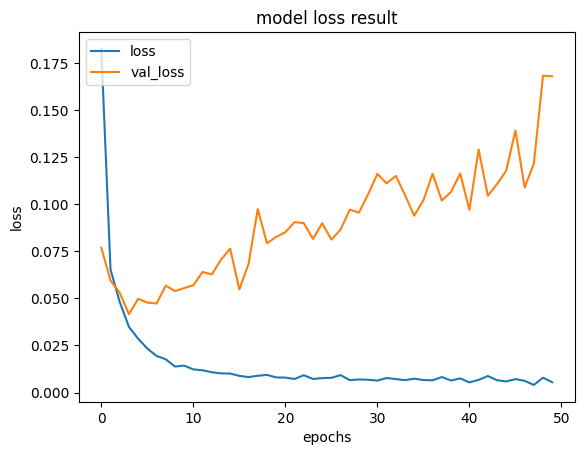

In [39]:
# 훈련결과 그래프 표시
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss result')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend(['loss','val_loss'], loc='upper left')
plt.show()

# 5. 모델 적용하기(예측:Predict)

In [44]:
# 모델 평가
loss, acc = model.evaluate(test_images, test_labels, verbose=2)

313/313 - 1s - 3ms/step - accuracy: 0.9865 - loss: 0.1679


In [45]:
acc

0.9865000247955322

In [46]:
# 모델 예측
result = model.predict(test_images)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


In [47]:
result[5000]

array([0.0000000e+00, 0.0000000e+00, 2.5254633e-33, 1.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00], dtype=float32)

In [48]:
result_value = np.argmax(result[5000])

In [49]:
print("예측 결과값 = %d" % (result_value))

예측 결과값 = 3


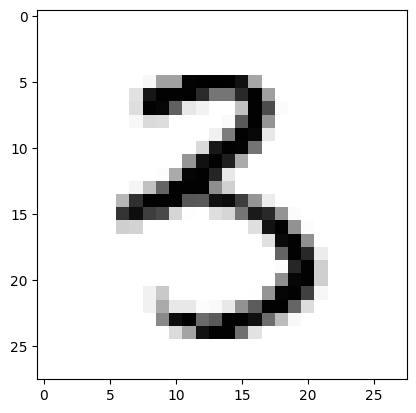

In [50]:
plt.imshow(test_images[5000], cmap='Greys')

In [51]:
# 모델 저장
model.save('mnist_cnn_20240517_epochs_50_9865.h5')

# 6. 실제 데이터 파일 검증

In [52]:
from PIL import Image, ImageOps

In [53]:
# 이미지 불러오기
image = Image.open('7.jpg')

In [54]:
# 이미지 흑백으로
image = image.convert('L')

In [56]:
# 인공지능에 들어갈 수 있는 형태로 변환
data = np.ndarray(shape=(1, 28, 28, 1), dtype=np.float32)
size = (28, 28)
image = ImageOps.fit(image, size, Image.LANCZOS)

image_array = np.array(image)
# 전처리
nor_image_array = (image_array.astype(np.float32) / 255.)
data = nor_image_array

img_data = data.reshape(1, 28, 28, 1)
img_data.shape

(1, 28, 28, 1)

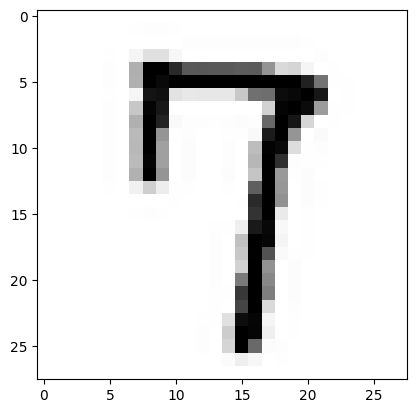

In [57]:
plt.imshow(image, cmap='Greys')

In [58]:
# 예측
result = model.predict(img_data)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


In [59]:
result

array([[0.0000000e+00, 4.4376156e-28, 8.2418055e-21, 2.7788323e-36,
        0.0000000e+00, 1.9736834e-37, 0.0000000e+00, 1.0000000e+00,
        8.1894067e-36, 0.0000000e+00]], dtype=float32)

In [60]:
rev_value = np.argmax(result)

In [61]:
print("실제 이미지 예측결과 = %d" % (rev_value))

실제 이미지 예측결과 = 7
